# The Tools for Data Science: Notebooks and Versioning

## AI4PH

This notebook is meant to accompany [these slides](https://docs.google.com/presentation/d/1_yGq02oKCgF3oP41a_aQtSqHXNEA1D9KAB7wV7DfoWo/edit?usp=sharing). 

![The Case](./images/thecase.png)

## Data Science Methodology

<img src="https://i.ibb.co/SKJDYGQ/Screenshot-2023-03-26-at-9-47-57-AM.png" alt="Jupyter Logo" style="height: 300px;"/>

We want to walk through today's case in a structured & systematic manner. As Data Science itself is fairly nascent industry, there are not that many well established methodologies for conducting it. The diagram shared above, is coming from IBM who is a leader in this field. You can learn more about it [here](https://developer.ibm.com/blogs/following-the-data-science-methodology/)

It's a structured way to think about, plan, and organize your work. You will notice that it's inspired from agile methodologies. Instead of betting everything on a "big bang" launch, an agile team delivers work in small, but consumable, increments. Requirements, plans, and results are evaluated continuously so teams have a natural mechanism for responding to change quickly. 

It's comprised of five iterative steps, and within those steps you have sub-categories that assist data scientists.

#### 1. Problem Understanding

Every customer request starts with a problem, and the data scientist's job is first to understand it and approach this problem with statistical and machine learning techniques. The Business Understanding stage is crucial because it helps to clarify the goal of the customer. In this stage, we have to ask a lot of questions to the customer about every single aspect of the problem; in this manner, we are sure that we will study data related, and at the end of this stage, we will have a list of business requirements. The first step to that is understanding the business what is the business dealing with, what is their input, what is the final output given by the business, and what are the other factors that lead to the final output. 

The next step is the Analytic Approach, where, once the business problem has been clearly stated, the data scientist can define the analytic approach to solve the problem. This step entails expressing the problem in the context of statistical and machine-learning techniques, and it is essential because it helps identify what type of patterns will be needed to address the question most effectively. If the issue is to determine the probabilities of something, then a predictive model might be used; if the question is to show relationships, a descriptive approach may be required, and if our problem requires counts, then statistical analysis is the best way to solve it. For each type of approach, we can use different algorithms.

#### 2. Data Requirements & Collection

Data Requirements is the stage where we identify the necessary data content, formats, and sources for initial data collection, and we use this data inside the algorithm of the approach we chose.

In the Data Collection Stage, data scientists identify the available data resources relevant to the problem domain. 

We have traditional data sources that that may be available to us from an institutions (i.e. ICES, hospital, local public health). There are also creative ways of getting access to data. Such as web scraping, or using APIs that we will tackle today.

#### 3. Data Understanding & Preparation
In the Data Understanding stage, data scientists try to understand more about the data collected before. We have to check the type of each data and to learn more about the attributes and their names. Data dictionaries are amazing, but may not always be there. Data dictionaries also have limits. (What's supposed to be in a field vs. what is actually there)

In the Data Preparation stage, data scientists prepare data for modeling, which is one of the most crucial steps because the model has to be clean and without errors.


#### 3. Modeling & Evaluation


Figuring out which model to use is, what assumptions each model makes, and what works for your data.

Evaluating models is a whole domain in itself. Key readings:

* [The medical algorithmic audit](https://www.thelancet.com/journals/landig/article/PIIS2589-7500(22)00003-6/fulltext)
* [Do no harm: a roadmap for responsible machine learning for health care](https://www.nature.com/articles/s41591-019-0548-6)
* [Model Cards for Model Reporting](https://arxiv.org/abs/1810.03993)

#### 4. Deployment, Monitoring, and Feedback


Once you have established confidence in the model, the next step is to move towards the deployment phase, where the model is released to a restricted group of people to obtain feedback on the predictions and assess its suitability for public use. Following deployment, feedback is collected from the users, enabling further refinement, evaluation, and subsequent deployment iterations until a final model is achieved. Upon finalization, the model can be deployed for use by a broader audience.

## Environment Set Up

### Version Control

Version control is an essential skill for any data scientist. It allows us to track changes, collaborate with others, and manage our code and data effectively. Today, we'll focus on Git, the most popular version control system, and GitHub, a platform for hosting Git repositories

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Git
    
<img src="https://miro.medium.com/max/910/1*Wjxx83j-qyiNvFBy1yOA1w.jpeg" alt="Git Logo" style="height: 300px;"/>

**What is it**: Git is a software that helps you keep track of changes to files in a folder on your PC. After making some changes to files in this folder, you can “commit” the changes to Git for safe-keeping. These changes could be creating, renaming, deleting a file or subfolder; or editing the content of a file.

**Why use it**: Git lets you keep track of changes over time and revert back when needed.

**Download**: Install from [here](https://git-scm.com/downloads)

**Resources**: Cheat sheet [here](https://i.redd.it/8341g68g1v7y.png)

</div>

Let's install Git. 

Now, let’s all go to GitHub.com and create a new account if you haven’t got one already.

Once you're logged in, click on the '+' sign in the top right corner and select 'New repository'. Name your repository 'ai4ph-data-science-tools' and make sure it's public. You can also add a README file right away.

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Github
    
<img src="https://github.githubassets.com/images/modules/logos_page/GitHub-Mark.png" alt="Github Logo" style="height: 300px;"/>

**What is it**: Github lets you keep a copy of your local git repositories in the cloud

**Why use it**: It lets you share and collaborate with others via Git's version control.

**Download**: Create an account [here](https://github.com/)

</div>

Great, now that we have our repositories, let’s clone them to your local machines. Open your terminal or command prompt and type git clone [URL of your repository]. Now, you have a copy of your repository on your local machine.

Let's create a simple Python script that prints 'Hello, Data Science World!'. Open your favorite text editor, write the script, and save it in the repository folder as hello.py. To push this change to GitHub, we need to use a few Git commands.

First, we'll add the new file to our Git staging area with ```git add hello.py```. Next, we'll commit our changes with a message using ```git commit -m 'Add hello.py script'```. Finally, we'll push our changes to GitHub with git push. Now, if you refresh your GitHub repository page, you should see hello.py there.

Now, imagine you want to collaborate with a fellow data scientist. You can do this by forking their repository, which creates a copy under your GitHub account. Then you can clone it, make changes, and suggest those changes back to the original repository with a pull request.

### Setting Up Environment

Python virtual environments are crucial for managing dependencies and ensuring that our projects are reproducible. They allow us to install packages in an isolated environment, which means we can avoid conflicts between project requirements.

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> VENV
    
<img src="https://miro.medium.com/v2/resize:fit:765/1*_-kpR6xh2U7kUZRVrflUCw.jpeg" alt="Python Virtual Venv" style="height: 400px;"/>

**What is it**: The venv module allows for creating lightweight “virtual environments”, each with their own independent set of Python packages installed in their site directories. 

**Why use it**: VENV lets you easily create and manage various environment with isolated dependencies.
    
**Key commands**: 
* Create an environment: ```python -m venv venv```
* Activate environment
    * Mac / Linux : ```source venv/bin/activate```
    * Windows: ```venv\Scripts\activate```
* Install dependencies: ```pip install pandas```
* Freeze enviornment: ```pip freeze > requirements.txt```
* Leave enviornment: ```deactivate```
    
</div>

Create a new environment
```python -m venv ds-env```

Now activate the environment by running
* Mac / Linux : ```source ds-venv/bin/activate```
* Windows: ```ds-venv\Scripts\activate```

Notice how your prompt changes to indicate that you're now working within the ds-env environment. This means any Python packages we install now will be local to this environment, keeping our global Python setup clean

Finally install jupyter notebooks ```pip install notebook```

Let's try exporting these to a requirements file using ```pip freeze > requirements.txt```

Open the created requirements.txt file. Notice how it's showing a number of different dependencies and version numbers. If you send your code + the latest version of this file, the user on the other end should be able to run your work easily.

Now lunch jupyter notebook by typing ```jupyter notebook```

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Jupyter Notebook
    
<img src="https://www.dataquest.io/wp-content/uploads/2019/01/1-LPnY8nOLg4S6_TG0DEXwsg-1.png" alt="Jupyter Logo" style="height: 300px;"/>

**What is it**: A Jupyter notebook is a document that supports mixing executable code, equations, visualizations, and narrative text. Specifically, Jupyter notebooks allow the user to bring together data, code, and prose, to tell an interactive, computational story. Jupyter notebook is free and open source and supports over 100 programming languages including Python, Java, R, Julia, Matlab, Octave, Scheme, Processing, Scala, and many more

**Why use it**: Jupyter is an interactive environment that can be shared with anyone. They can run through the code, collaborate and understand the story by mixing formatted text with the code.

**Download**: Install from [here](https://jupyter.org/install)

**Resources**: Cheat sheet [here](https://www.edureka.co/blog/wp-content/uploads/2018/10/Jupyter_Notebook_CheatSheet_Edureka.pdf)

</div>

This will open a new tab in your default web browser that should look something like the following screenshot.

![Jupyter](./images/Jupyter.png)

This is the Notebook Dashboard, specifically designed for managing your Jupyter Notebooks. Think of it as the launchpad for exploring, editing and creating your notebooks.

You can create a new notebook by clicking New in the top right hand corner

![Markdown](./images/New.png)

This lets you create a new notebook. Currently the only option is Python. However if you have other kernels installed (such as R) you would see them here.

![Notebook](https://www.dataquest.io/wp-content/uploads/2019/01/new-notebook.jpg)

Once you have opened the notebook, the interface shouldn't be too hard to figure out. There are two new terms you have to learn

* Kernels: the engine that executes the code. Could be python, R, or other.
* Cells: container for text to be displayed in the notebook or code to be executed by the notebook’s kernel.

In each cell, you can either write code to execute or write markdown (text formatting system similiar to HTML). 

To execute code, you can use the run button in the toolbar, or use the shortcut of `shift + enter` Go ahead and execute the following code block which should print out `Hello AI4PH` by using either the run button or the shortcut keys

In [1]:
print("Hello AI4PH")

Hello AI4PH


When we run the cell, its output is displayed below and the label to its left will have changed from In [ ] to In [1]. Representing the first code cell being run

Run the cell again and the label will change to In [2] because now the cell was the second to be run on the kernel. This numbering system makes it clear the order in which your code was run. While it's good practice to clean up your code and make sure it should be run from the top of the page to the bottom, this requirements is not enforced. Which is why this number system is so cruicial. 

In [10]:
!pip install bs4
!pip install selenium
!pip install pandas
!pip install html5lib
!pip install matplotlib
!pip install scikit-learn
!pip install lxml


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 54.4 MB/s eta 0:00:00m eta 0:00:010:01:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


If you have git installed on your local computer, you can get the code by cloning from github by running ```git clone https://github.com/farbodab/ds-tools-ai4ph.git```

## Business Understanding

After a number of back and forths meetings with our bosses, we have a fairly good understanding of what they are trying to do.

**Problem**: 

**Business Requirement**: 
* The health system is looking to use data to plan for capacity and for response planning
* Stakeholders are looking for a weekly email to be delivered to them which has the 7 day prediction of COVID-19 cases.

## Analytics Approach

The nature of the problem is a predictive one. Since the goal is to predict number of cases, then the task at hand is to building, testing and implementing a regression model.

## Data Requirements

As a starting point, we need data on daily covid cases. We already have a number of different data elements that may improve the predictive power of the proposed model (location of cases, socioeconomic factors tied to geography, age of cases, etc). The process is entirely iterative. 

## Data Collection

### Web Scraping

In the beggining of the pandemic, availability of COVID-19 data was sparse. The only source of such data could be found on Ontario Government's website below.
![status](./images/status.png)

To extract data from the website we need to scrape the webpage and extract it from the underlying code that renders the website. While data sources have matured over time, web scrapping is a fairly unique and extremely useful skilset to have in your toolbelt when doing public health on the go. Make sure to download chromedriver that matches your operating system and the version of chrome you are on from [here](https://chromedriver.chromium.org/downloads)

Way back machine link for the page from May 1, 2020 [here](https://web.archive.org/web/20200501004732/https://www.ontario.ca/page/how-ontario-is-responding-covid-19)

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

driver = webdriver.Chrome()
driver.get("http://www.python.org")
elem = driver.find_element("name","q")
elem.clear()
elem.send_keys("pycon")
elem.send_keys(Keys.RETURN)
driver.close()

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Selenium
<img src="https://camo.githubusercontent.com/74ed64243ba05754329bc527cd4240ebd1c087a1/68747470733a2f2f73656c656e69756d2e6465762f696d616765732f73656c656e69756d5f6c6f676f5f7371756172655f677265656e2e706e67" alt="Selenium" style="width: 200px;"/> 
    
**What is it**: It's a tool used to scrape data from the web which lets you automate the operations of your browser

**Why use it**: A lot of information remains locked in websites and is only updated there without being available in a easy to use format. Selenium lets us get access to that info and turn it into usable data.

**Download**: Follow instructions [here](https://selenium-python.readthedocs.io/) to set it up.

**Resources**: Cheat sheet [here](https://ivantay2003.medium.com/selenium-cheat-sheet-in-python-87221ee06c83)
    
**Notes**: Users on MacOS will need to do to an additional step to be able to use the driver downloaded from above, which is to mark the file as safe by using the command ```xattr -d com.apple.quarantine name-of-file ```
    
</div>

If selenium is set up, this should launch your browser to python's website, and search for the words pycon.

Now that we know things are working, let's go to our real example.

In [7]:
url = "https://web.archive.org/web/20200501004732/https://www.ontario.ca/page/how-ontario-is-responding-covid-19"
driver = webdriver.Chrome()
driver.get(url)

This should open a new chromium page and navigate it to our data source. Now we use the xpath of the table of interest to get the specific element on the page and we save its html content to a variable

In [8]:
element = driver.find_element("xpath",'//*[@id="pagebody"]/table[1]')
element_html = element.get_attribute('outerHTML')
driver.close()

The next library we will be using today is called pandas. Pandas is the go to data manipulation and wrangling library for python

In [11]:
import pandas as pd

df = pd.read_html(element_html)[0]
df.head()

/var/folders/50/ht8vk5sd2f51y9x7p1nt3qwh0000gn/T/ipykernel_45929/3818956970.py:3: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(element_html)[0]


,Unnamed: 0,Number,Percentage
0,Number of cases1,16187.0,NaN
1,Change from previous report,459.0,2.9% increase
2,Resolved2,10205.0,63.0
3,Deceased3,1082.0,6.3
4,Demographics,NaN,NaN


Now that we have our table of interest we can just save it to file, so we can start to keep track of cases daily. 

In [12]:
df.to_csv('cases-may-1-2020.csv',index=False)

### Official Data Source

The main dataset we will be using is from [here](https://data.ontario.ca/en/dataset/confirmed-positive-cases-of-covid-19-in-ontario).

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Requests

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/a/aa/Requests_Python_Logo.png/800px-Requests_Python_Logo.png" alt="Requests" style="height: 200px;"/>

**What is it**: Requests is a library for making http requests using python. I.e. interact wit the web

**Why use it**: Download files from websites + make api calls. 

**Download**: Install it by using pip ```pip install requests```

**Resources**: Cheat sheet [here](https://realpython.com/python-requests/)
    
</div>

In [2]:
import requests

In [3]:
url = "https://data.ontario.ca/dataset/f4112442-bdc8-45d2-be3c-12efae72fb27/resource/455fd63b-603d-4608-8216-7d8647f43350/download/conposcovidloc.csv"
filename = 'conposcovidloc.csv'
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}
response = requests.get(url, headers=headers)

In [4]:
with open(filename, mode="wb") as file:
    file.write(response.content)

## Data Understanding

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Pandas

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" alt="Selenium" style="height: 200px;"/>

**What is it**: Pandas is a python library for data manipulation and analysis. It is the de facto library for data manipulation in python.

**Why use it**: It's extremely powerful. It lets you read in a variety of dataformats and data sources, aggregate, transform, and combine data. 

**Download**: Install it by using pip ```pip install pandas```

**Resources**: Cheat sheet [here](https://ainfographics.files.wordpress.com/2017/10/python-pandas-cheat-sheet.png)
    
</div>

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Matplotlib

<img src="https://matplotlib.org/stable/_images/sphx_glr_logos2_003.png" alt="Matplotlib" style="height: 100px;"/>

**What is it**: Matplotlib is a python library for plotting and data visualization. 

**Why use it**: It's free and open source and extremely customizable. 

**Download**: Install it by using pip ```pip install matplotlib```

**Resources**: Cheat sheet [here](https://raw.githubusercontent.com/matplotlib/cheatsheets/master/cheatsheets-1.png)
    
</div>

Pandas is a powerful library for data manipulation and analysis, providing data structures and functions that make working with structured data intuitive. One of Pandas' strengths is its ability to read data from a variety of sources. You can read data from CSVs, Excel files, SQL databases, JSON, HTML, and more. The pd.read_csv() function is something you’ll use a lot

In [5]:
import pandas as pd
all_cases = pd.read_csv(filename)

We will use the .head() command which will print the first few rows of the data so we can visually inspect it

In [6]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
0,1,1934-09-28,2022-09-29,2022-09-29,2022-09-27,<20,FEMALE,NaN,2262,Thunder Bay District Health Unit,999 Balmoral Street,Thunder Bay,P7B 6E7,www.tbdhu.com,48.400572,-89.258851
1,2,1989-02-21,2022-11-08,2022-11-07,2022-11-06,<20,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
2,3,2000-03-01,2022-01-30,NaN,2000-03-01,<20,FEMALE,NaN,2243,"Leeds, Grenville and Lanark District Health Unit",458 Laurier Boulevard,Brockville,K6V 7A3,www.healthunit.org,44.615843,-75.702833
3,4,2002-07-06,2022-07-06,2022-07-07,2002-07-06,20s,FEMALE,NaN,2270,York Region Public Health Services,17250 Yonge Street,Newmarket,L3Y 6Z1,www.york.ca/wps/portal/yorkhome/health/,44.048023,-79.480239
4,5,2002-08-08,2022-08-15,2022-08-15,2022-08-14,60s,MALE,NaN,2233,Grey Bruce Health Unit,101 17th Street East,Owen Sound,N4K 0A5,www.publichealthgreybruce.on.ca/,44.576196,-80.940980


What columns does this dataset include? What type are they? and how many null variables do they have? .info() can give us a good overview

In [7]:
all_cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656855 entries, 0 to 1656854
Data columns (total 16 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   Row_ID                     1656855 non-null  int64  
 1   Accurate_Episode_Date      1656855 non-null  object 
 2   Case_Reported_Date         1656855 non-null  object 
 3   Test_Reported_Date         1606209 non-null  object 
 4   Specimen_Date              1645115 non-null  object 
 5   Age_Group                  1656855 non-null  object 
 6   Client_Gender              1656855 non-null  object 
 7   Outcome1                   17037 non-null    object 
 8   Reporting_PHU_ID           1656855 non-null  int64  
 9   Reporting_PHU              1656855 non-null  object 
 10  Reporting_PHU_Address      1656855 non-null  object 
 11  Reporting_PHU_City         1656855 non-null  object 
 12  Reporting_PHU_Postal_Code  1656855 non-null  object 
 13  Reporting_PH

In [8]:
all_cases.describe()

,Row_ID,Reporting_PHU_ID,Reporting_PHU_Latitude,Reporting_PHU_Longitude
count,1.656855e+06,1.656855e+06,1.656855e+06,1.656855e+06
mean,8.284280e+05,2.687663e+03,4.395948e+01,-7.973805e+01
std,4.782930e+05,7.634479e+02,1.148006e+00,2.389030e+00
min,1.000000e+00,2.226000e+03,4.230880e+01,-9.448825e+01
25%,4.142145e+05,2.246000e+03,4.346288e+01,-7.987134e+01
50%,8.284280e+05,2.257000e+03,4.365659e+01,-7.948024e+01
75%,1.242642e+06,3.895000e+03,4.404802e+01,-7.937936e+01
max,1.656855e+06,5.183000e+03,4.976961e+01,-7.473630e+01


Let's see how we can perform operations like filtering, grouping, and summarizing data with just a few lines of code

Once we have our data in a DataFrame, the next step is usually to select and filter the data we're interested in. Pandas offers various methods for indexing and selecting data, including using .loc[] for label-based indexing and .iloc[] for positional indexing.

Let's select all cases were the accurate episode date is after '2020-01-01'

In [9]:
len(all_cases)

1656855

In [10]:
all_cases = all_cases.loc[all_cases['Accurate_Episode_Date'] > '2020-01-01']
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome1,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
13,14,2020-01-10,2020-06-10,2020-06-10,2020-06-09,50s,MALE,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
14,15,2020-01-16,2020-10-08,2020-10-08,2020-10-06,50s,FEMALE,NaN,2258,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298
15,16,2020-01-21,2020-01-23,2020-01-26,2020-01-23,50s,MALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
16,17,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
17,18,2020-01-22,2020-10-24,2020-10-24,2020-01-22,20s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [11]:
len(all_cases)

1656842

How many cases were dropped?

In [12]:
1656855 - 1656842 

13

Data rarely comes clean. We often need to rename columns, handle missing values, or remove unnecessary data. Pandas provides a robust set of tools to handle these tasks, such as .rename(), .dropna(), .fillna(), and .drop().

Let's rename the "Outcome1" column to "Outcome"

In [13]:
all_cases.rename(columns={"Outcome1": "Outcome"}, inplace=True)
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome,Reporting_PHU_ID,Reporting_PHU,Reporting_PHU_Address,Reporting_PHU_City,Reporting_PHU_Postal_Code,Reporting_PHU_Website,Reporting_PHU_Latitude,Reporting_PHU_Longitude
13,14,2020-01-10,2020-06-10,2020-06-10,2020-06-09,50s,MALE,NaN,2234,Haldimand-Norfolk Health Unit,12 Gilbertson Drive,Simcoe,N3Y 4N5,www.hnhu.org,42.847825,-80.303815
14,15,2020-01-16,2020-10-08,2020-10-08,2020-10-06,50s,FEMALE,NaN,2258,Eastern Ontario Health Unit,1000 Pitt Street,Cornwall,K6J 5T1,www.eohu.ca,45.029152,-74.736298
15,16,2020-01-21,2020-01-23,2020-01-26,2020-01-23,50s,MALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
16,17,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358
17,18,2020-01-22,2020-10-24,2020-10-24,2020-01-22,20s,FEMALE,NaN,3895,Toronto Public Health,"277 Victoria Street, 5th Floor",Toronto,M5B 1W2,www.toronto.ca/community-people/health-wellnes...,43.656591,-79.379358


In [14]:
all_cases['Outcome'].value_counts()

Outcome
FATAL    17037
Name: count, dtype: int64

It seems only fatal is recorded as an outcome. Those who survived are left blank. Let's fix that

In [15]:
all_cases['Outcome'].fillna('SURVIVED', inplace=True)

In [16]:
all_cases['Outcome'].value_counts()

Outcome
SURVIVED    1639805
FATAL         17037
Name: count, dtype: int64

Let's drop PHU geographical data as we don't plan to do any subanalysis here

In [17]:
all_cases = all_cases.drop(columns=['Reporting_PHU_Postal_Code','Reporting_PHU_Website','Reporting_PHU_Latitude','Reporting_PHU_Longitude', 'Reporting_PHU_Address', 'Reporting_PHU_City'])
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome,Reporting_PHU_ID,Reporting_PHU
13,14,2020-01-10,2020-06-10,2020-06-10,2020-06-09,50s,MALE,SURVIVED,2234,Haldimand-Norfolk Health Unit
14,15,2020-01-16,2020-10-08,2020-10-08,2020-10-06,50s,FEMALE,SURVIVED,2258,Eastern Ontario Health Unit
15,16,2020-01-21,2020-01-23,2020-01-26,2020-01-23,50s,MALE,SURVIVED,3895,Toronto Public Health
16,17,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,SURVIVED,3895,Toronto Public Health
17,18,2020-01-22,2020-10-24,2020-10-24,2020-01-22,20s,FEMALE,SURVIVED,3895,Toronto Public Health


Pandas shines when it comes to data manipulation. You can perform operations on columns, apply functions, and aggregate data. Operations like .groupby() and .merge() are part of this

Let's ask and answer some questions and apply some of the above!

**Summarize:** How did the cases break down by age? .value_counts() will give us the count of the unique values

In [18]:
all_cases['Age_Group'].value_counts()

Age_Group
20s        302347
30s        266062
<20        239832
40s        229868
50s        217269
60s        145107
70s        102623
80s         96993
90+         56204
UNKNOWN       537
Name: count, dtype: int64

We can normalize it to get the proportions

In [19]:
all_cases['Age_Group'].value_counts(normalize=True)

Age_Group
20s        0.182484
30s        0.160584
<20        0.144752
40s        0.138739
50s        0.131134
60s        0.087580
70s        0.061939
80s        0.058541
90+        0.033922
UNKNOWN    0.000324
Name: proportion, dtype: float64

Finally, a great feature of Pandas is its built-in visualization capabilities. You can plot your data directly from a DataFrame using methods like .plot() and .hist()

**Visualize:** We can graph it by adding .plot() to the end. We can specify different kinds of plots as well!

<Axes: xlabel='Age_Group'>

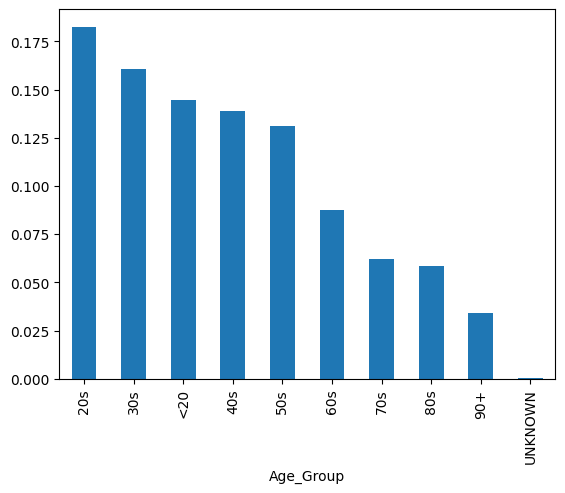

In [20]:
all_cases['Age_Group'].value_counts(normalize=True).plot(kind='bar')

How did the cases break down by gender?

In [21]:
all_cases['Client_Gender'].value_counts()

Client_Gender
FEMALE            912446
MALE              733141
UNSPECIFIED        11245
GENDER DIVERSE        10
Name: count, dtype: int64

In [22]:
all_cases['Client_Gender'].value_counts(normalize=True)

Client_Gender
FEMALE            0.550714
MALE              0.442493
UNSPECIFIED       0.006787
GENDER DIVERSE    0.000006
Name: proportion, dtype: float64

<Axes: xlabel='Client_Gender'>

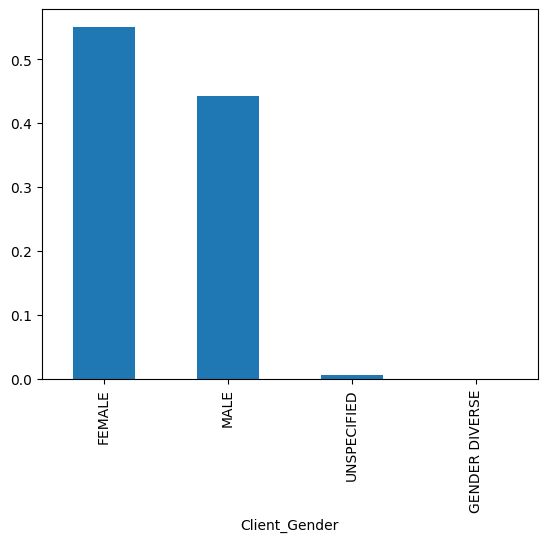

In [23]:
all_cases['Client_Gender'].value_counts(normalize=True).plot(kind='bar')

**Group:** Let's group by age and see how the outcome breaks down

In [24]:
all_cases.groupby(['Age_Group'])['Outcome'].value_counts(normalize=True)

Age_Group  Outcome 
20s        SURVIVED    0.999848
           FATAL       0.000152
30s        SURVIVED    0.999553
           FATAL       0.000447
40s        SURVIVED    0.998852
           FATAL       0.001148
50s        SURVIVED    0.996364
           FATAL       0.003636
60s        SURVIVED    0.986865
           FATAL       0.013135
70s        SURVIVED    0.965261
           FATAL       0.034739
80s        SURVIVED    0.940511
           FATAL       0.059489
90+        SURVIVED    0.918992
           FATAL       0.081008
<20        SURVIVED    0.999900
           FATAL       0.000100
UNKNOWN    SURVIVED    1.000000
Name: proportion, dtype: float64

**Filter:** For people where the outcome was fatal, how was the age broken down?

In [25]:
fatal_cases = all_cases.loc[all_cases.Outcome == 'FATAL']
fatal_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome,Reporting_PHU_ID,Reporting_PHU
80,81,2020-03-01,2020-03-31,2020-03-31,2020-03-28,70s,FEMALE,FATAL,4913,Southwestern Public Health
87,88,2020-03-01,2020-04-19,2020-04-19,2020-04-16,90+,FEMALE,FATAL,2253,Peel Public Health
131,132,2020-03-04,2020-03-18,2020-03-13,2020-03-13,50s,MALE,FATAL,2236,Halton Region Health Department
134,135,2020-03-04,2020-04-06,2020-04-07,2020-04-04,70s,FEMALE,FATAL,2265,"Region of Waterloo, Public Health"
153,154,2020-03-05,2020-03-21,2020-03-21,2020-03-19,80s,MALE,FATAL,2235,"Haliburton, Kawartha, Pine Ridge District Heal..."


In [26]:
fatal_cases['Age_Group'].value_counts(normalize=True)

Age_Group
80s    0.338675
90+    0.267242
70s    0.209250
60s    0.111874
50s    0.046370
40s    0.015496
30s    0.006985
20s    0.002700
<20    0.001409
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

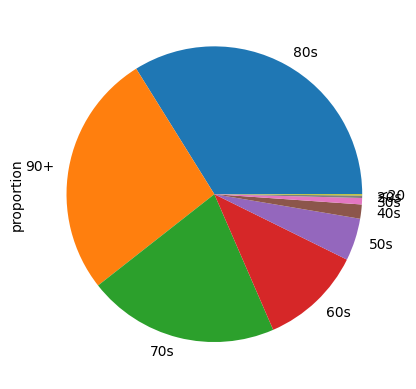

In [27]:
fatal_cases['Age_Group'].value_counts(normalize=True).plot(kind='pie')

***Calculate***: Let's calculate the test turn around time next

In [28]:
all_cases['Case_Reported_Date'] = pd.to_datetime(all_cases['Case_Reported_Date'])
all_cases['Specimen_Date'] = pd.to_datetime(all_cases['Specimen_Date'])
all_cases['Test_Reported_Date'] = pd.to_datetime(all_cases['Test_Reported_Date'])
all_cases['Test_Turn_Around'] = all_cases['Test_Reported_Date'] - all_cases['Specimen_Date']
all_cases['Test_Turn_Around'] = all_cases['Test_Turn_Around'].dt.days

***Summarize***: Generate descriptive statistics using .describe()

In [29]:
all_cases['Test_Turn_Around'].describe()

count    1.606031e+06
mean     1.897179e+00
std      2.411731e+01
min     -2.104300e+04
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.250000e+03
Name: Test_Turn_Around, dtype: float64

Specify percentiles

In [30]:
all_cases['Test_Turn_Around'].describe(percentiles=[0.01,0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    1.606031e+06
mean     1.897179e+00
std      2.411731e+01
min     -2.104300e+04
1%       0.000000e+00
5%       0.000000e+00
10%      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
90%      3.000000e+00
95%      5.000000e+00
99%      1.400000e+01
max      7.250000e+03
Name: Test_Turn_Around, dtype: float64

There seems to be negative test turn around! Let's look at those

In [31]:
all_cases.loc[all_cases['Test_Turn_Around'] < 0].head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome,Reporting_PHU_ID,Reporting_PHU,Test_Turn_Around
4196,4197,2020-03-26,2020-04-01,2020-03-31,2020-04-01,80s,MALE,FATAL,2270,York Region Public Health Services,-1.0
4928,4929,2020-03-28,2020-04-06,2020-04-03,2020-04-04,80s,MALE,SURVIVED,2234,Haldimand-Norfolk Health Unit,-1.0
5340,5341,2020-03-30,2020-03-31,2020-03-01,2020-03-31,40s,FEMALE,SURVIVED,3895,Toronto Public Health,-30.0
5431,5432,2020-03-30,2020-04-02,2020-04-02,2020-04-12,50s,MALE,SURVIVED,2242,Lambton Public Health,-10.0
6888,6889,2020-04-02,2020-04-22,2020-04-22,2020-04-24,60s,FEMALE,SURVIVED,3895,Toronto Public Health,-2.0


Let's drop those

In [32]:
all_cases.drop(all_cases.loc[all_cases['Test_Turn_Around'] < 0].index,inplace=True)

In [33]:
all_cases['Test_Turn_Around'].describe()

count    1.605447e+06
mean     1.951757e+00
std      9.349249e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.250000e+03
Name: Test_Turn_Around, dtype: float64

The max is also really high. Chances are no one waited 7306 days for their test result. Let's identify and drop max outliers as well

In [34]:
all_cases.drop(all_cases.loc[all_cases['Test_Turn_Around'] > 14].index,inplace=True)

In [35]:
all_cases['Test_Turn_Around'].describe()

count    1.589807e+06
mean     1.498650e+00
std      1.534917e+00
min      0.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      1.400000e+01
Name: Test_Turn_Around, dtype: float64

<Axes: >

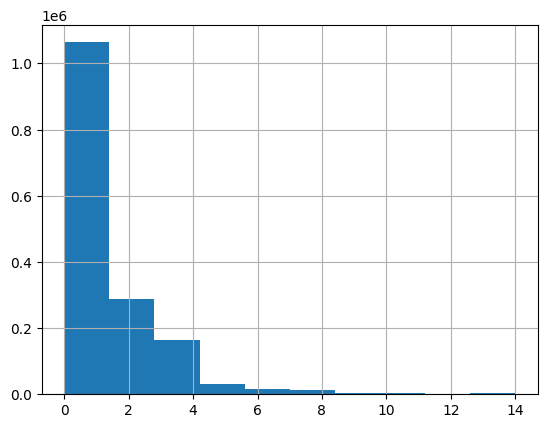

In [36]:
all_cases['Test_Turn_Around'].hist()

In [37]:
all_cases['Case_Reported_Year'] = all_cases['Case_Reported_Date'].dt.year
all_cases['Case_Reported_Month'] = all_cases['Case_Reported_Date'].dt.month

In [38]:
all_cases.head()

,Row_ID,Accurate_Episode_Date,Case_Reported_Date,Test_Reported_Date,Specimen_Date,Age_Group,Client_Gender,Outcome,Reporting_PHU_ID,Reporting_PHU,Test_Turn_Around,Case_Reported_Year,Case_Reported_Month
13,14,2020-01-10,2020-06-10,2020-06-10,2020-06-09,50s,MALE,SURVIVED,2234,Haldimand-Norfolk Health Unit,1.0,2020,6
14,15,2020-01-16,2020-10-08,2020-10-08,2020-10-06,50s,FEMALE,SURVIVED,2258,Eastern Ontario Health Unit,2.0,2020,10
15,16,2020-01-21,2020-01-23,2020-01-26,2020-01-23,50s,MALE,SURVIVED,3895,Toronto Public Health,3.0,2020,1
16,17,2020-01-22,2020-01-23,2020-01-27,2020-01-25,50s,FEMALE,SURVIVED,3895,Toronto Public Health,2.0,2020,1
18,19,2020-01-24,2020-01-24,2020-02-04,2020-01-24,20s,FEMALE,SURVIVED,2244,Middlesex-London Health Unit,11.0,2020,1


In [39]:
all_cases.groupby([all_cases['Case_Reported_Year'], all_cases['Case_Reported_Month']])['Test_Turn_Around'].mean()

Case_Reported_Year  Case_Reported_Month
2020                1                      5.333333
                    2                      1.000000
                    3                      3.355153
                    4                      2.032061
                    5                      2.098434
                    6                      2.138291
                    7                      1.890996
                    8                      1.650635
                    9                      2.416257
                    10                     2.346661
                    11                     1.797343
                    12                     2.047088
2021                1                      1.647950
                    2                      1.265427
                    3                      1.398196
                    4                      1.311063
                    5                      1.082550
                    6                      1.027047
                    7   

<Axes: xlabel='Case_Reported_Year,Case_Reported_Month'>

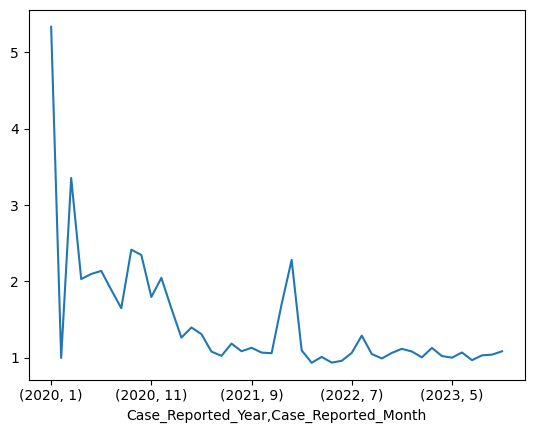

In [40]:
all_cases.groupby([all_cases['Case_Reported_Year'], all_cases['Case_Reported_Month']])['Test_Turn_Around'].mean().plot()

How does this correlate with the number of cases?

<Axes: xlabel='Case_Reported_Date'>

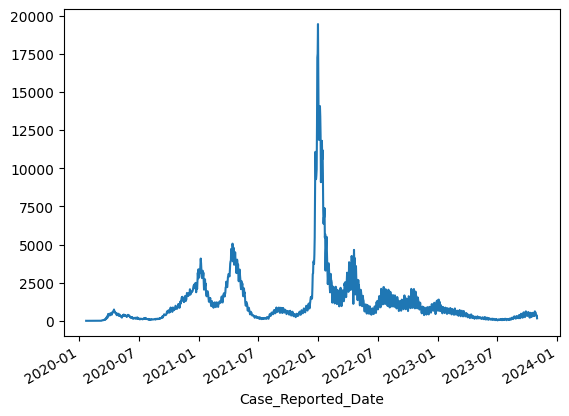

In [41]:
all_cases.groupby(['Case_Reported_Date'])['Row_ID'].count().plot()

## Data Preparation

In [42]:
agg = all_cases.groupby(['Accurate_Episode_Date'])['Row_ID'].count().to_frame().reset_index()
agg['Accurate_Episode_Date'] = pd.to_datetime(agg['Accurate_Episode_Date'])
agg.tail()

,Accurate_Episode_Date,Row_ID
1363,2023-10-27,424
1364,2023-10-28,286
1365,2023-10-29,217
1366,2023-10-30,244
1367,2023-10-31,35


Next. Let's visualize the data to make sure our aggregation worked as expected

Text(0.5, 1.0, 'Number of cases over time')

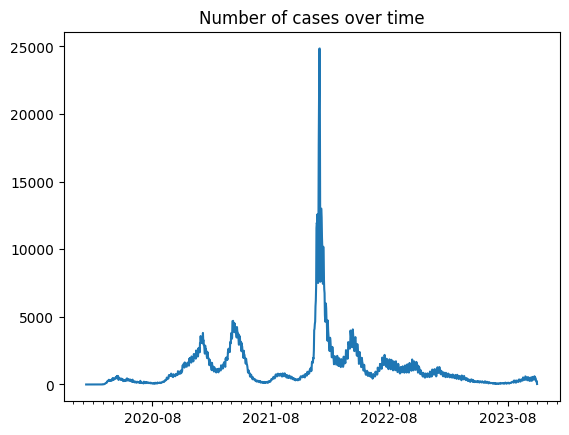

In [43]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

fig = plt.figure()
ax = plt.axes()

x = agg['Accurate_Episode_Date']
y = agg['Row_ID']
ax.plot(x, y)

# Major ticks every 6 months.
fmt_half_year = mdates.MonthLocator(interval=12)
ax.xaxis.set_major_locator(fmt_half_year)

# Minor ticks every month.
fmt_month = mdates.MonthLocator()
ax.xaxis.set_minor_locator(fmt_month)

# Text in the x axis will be displayed in 'YYYY-mm' format.
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))

plt.title("Number of cases over time")

We have a timeseries problem. Let's get the data in shape for it. Let's drop any data in 2019 as the tail is not going to be as relevant for predicting the most recent data. 

In [44]:
agg.head()

,Accurate_Episode_Date,Row_ID
0,2020-01-10,1
1,2020-01-16,1
2,2020-01-21,1
3,2020-01-22,1
4,2020-01-24,1


In [45]:
agg.tail()

,Accurate_Episode_Date,Row_ID
1363,2023-10-27,424
1364,2023-10-28,286
1365,2023-10-29,217
1366,2023-10-30,244
1367,2023-10-31,35


In [46]:
agg = agg.drop(agg.loc[agg.Accurate_Episode_Date < '2020-01-01'].index)

In [47]:
agg.head()

,Accurate_Episode_Date,Row_ID
0,2020-01-10,1
1,2020-01-16,1
2,2020-01-21,1
3,2020-01-22,1
4,2020-01-24,1


Let's shif the data to use the last seven day's worth of case numbers ot predict the next day's.

In [48]:
agg['t-1'] = agg['Row_ID'].shift(1)
agg['t-2'] = agg['Row_ID'].shift(2)
agg['t-3'] = agg['Row_ID'].shift(3)
agg['t-4'] = agg['Row_ID'].shift(4)
agg['t-5'] = agg['Row_ID'].shift(5)
agg['t-6'] = agg['Row_ID'].shift(6)
agg['t-7'] = agg['Row_ID'].shift(7)
agg['t'] = agg['Row_ID']

In [49]:
agg.head(14)

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
0,2020-01-10,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,2020-01-16,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,2020-01-21,1,1.0,1.0,NaN,NaN,NaN,NaN,NaN,1
3,2020-01-22,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1
4,2020-01-24,1,1.0,1.0,1.0,1.0,NaN,NaN,NaN,1
5,2020-01-25,1,1.0,1.0,1.0,1.0,1.0,NaN,NaN,1
6,2020-01-27,1,1.0,1.0,1.0,1.0,1.0,1.0,NaN,1
7,2020-01-29,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
8,2020-01-31,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
9,2020-02-01,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1


In [50]:
agg.dropna(how='any',inplace=True)

In [51]:
agg.head()

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
7,2020-01-29,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
8,2020-01-31,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
9,2020-02-01,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
10,2020-02-02,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1
11,2020-02-05,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2


In [52]:
agg.tail()

,Accurate_Episode_Date,Row_ID,t-1,t-2,t-3,t-4,t-5,t-6,t-7,t
1363,2023-10-27,424,482.0,531.0,503.0,607.0,360.0,348.0,427.0,424
1364,2023-10-28,286,424.0,482.0,531.0,503.0,607.0,360.0,348.0,286
1365,2023-10-29,217,286.0,424.0,482.0,531.0,503.0,607.0,360.0,217
1366,2023-10-30,244,217.0,286.0,424.0,482.0,531.0,503.0,607.0,244
1367,2023-10-31,35,244.0,217.0,286.0,424.0,482.0,531.0,503.0,35


Let's create a training and test set using a 70% / 30% split.

In [53]:
x = agg[['t-1','t-2','t-3','t-4','t-5','t-6','t-7']]
y = agg['t']

test_size = 0.3
dataset_size = len(agg)
test_index = int(test_size * dataset_size)


x_train, x_test, y_train, y_test = x[:test_index], x[test_index:], y[:test_index], y[test_index:]

In [54]:
x.shape

(1361, 7)

In [55]:
y.shape

(1361,)

In [56]:
x_train.head()

,t-1,t-2,t-3,t-4,t-5,t-6,t-7
7,1.0,1.0,1.0,1.0,1.0,1.0,1.0
8,1.0,1.0,1.0,1.0,1.0,1.0,1.0
9,1.0,1.0,1.0,1.0,1.0,1.0,1.0
10,1.0,1.0,1.0,1.0,1.0,1.0,1.0
11,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [57]:
y_train.head()

7     1
8     1
9     1
10    1
11    2
Name: t, dtype: int64

## Modelling and Evaluation

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Scikit-Learn

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/05/Scikit_learn_logo_small.svg/1200px-Scikit_learn_logo_small.svg.png" alt="Sklearn" style="height: 200px;"/>

**What is it**: Scikit-Learn is a python library for machine learning. 

**Why use it**:  It has various classification, regression and clustering algorithms and is designed to run efficiently. 

**Download**: Install it by using pip ```pip install sklearn```

**Resources**: Library cheat sheet [here](https://d1jnx9ba8s6j9r.cloudfront.net/blog/wp-content/uploads/2018/09/Python-Cheat-Sheet-for-Scikit-learn-Edureka.pdf?utm_source=blog&utm_medium=cheat-sheet&utm_campaign=Scikit-Cheat-Sheet-28-09-2018-AH). Model selection cheat sheet [here](https://scikit-learn.org/stable/_static/ml_map.png)
    
</div>

Which model to choose [cheat sheet](https://scikit-learn.org/stable/_static/ml_map.png)
<img src="https://scikit-learn.org/stable/_static/ml_map.png" />

Let's try a handful of models and see how the mean absolute error is for each. 

In [59]:
from sklearn.metrics import mean_absolute_error

In [60]:
from sklearn.linear_model import LinearRegression

lin_regr = LinearRegression()
lin_regr.fit(x_train,y_train)
y_pred = lin_regr.predict(x_test)
mean_absolute_error(y_test,y_pred)
round(mean_absolute_error(y_test,y_pred),2)

229.15

In [61]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


rfr_regr = RandomForestRegressor()
rfr_regr.fit(x_train,y_train)
y_pred = rfr_regr.predict(x_test)
round(mean_absolute_error(y_test,y_pred),2)

407.9

In [62]:
from sklearn.linear_model import Lasso

las_regr = Lasso()
las_regr.fit(x_train,y_train)
y_pred = las_regr.predict(x_test)
mean_absolute_error(y_test,y_pred)
round(mean_absolute_error(y_test,y_pred),2)

229.14

In [63]:
from sklearn.linear_model import Ridge

rid_regr = Ridge()
rid_regr.fit(x_train,y_train)
y_pred = rid_regr.predict(x_test)
mean_absolute_error(y_test,y_pred)
round(mean_absolute_error(y_test,y_pred),2)

229.15

In [64]:
from sklearn.svm import SVR

svr_regr = SVR(kernel='rbf')
svr_regr.fit(x_train,y_train)
y_pred = svr_regr.predict(x_test)
round(mean_absolute_error(y_test,y_pred),2)

971.62

## Deployment

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Pickle

<img src="https://miro.medium.com/v2/resize:fit:1400/0*wa9Cv7MKzTWhf8go" alt="Pickle" style="height: 200px;"/>

**What is it**: A module that allows python objects to be saved and loaded from a file

**Why use it**:  Save model weights, and be able to use it to deploy your model / inference

**Resources**: Cheat sheet [here](https://www.docker.com/sites/default/files/d8/2019-09/docker-cheat-sheet.pdf)
    
</div>

In [104]:
import pickle

with open('linear_regressor.pickle', "wb") as output_file:
    pickle.dump(lin_regr, output_file)

In [86]:
history = {
    "t_1": 245,
    "t_2": 217,
    "t_3": 286,
    "t_4": 424,
    "t_5": 482,
    "t_6": 531,
    "t_7": 503
}

In [106]:
import pandas as pd
model = pickle.load(open("linear_regressor.pickle", "rb"))
history_df = pd.DataFrame({
    "t-1": [history["t_1"]],
    "t-2": [history["t_2"]],
    "t-3": [history["t_3"]],
    "t-4": [history["t_4"]],
    "t-5": [history["t_5"]],
    "t-6": [history["t_6"]],
    "t-7": [history["t_7"]],
})
prediction = model.predict(test_row)
prediction

array([283.49158526])

In [102]:
round(prediction[0])

283

<div style="padding: 10px; border: 2px black solid;">

#### <font color='green'>New Tool Alert:</font> Docker

<img src="https://logos-world.net/wp-content/uploads/2021/02/Docker-Symbol.png" alt="Sklearn" style="height: 200px;"/>

**What is it**: Containerization tool mainly used for shipping and running applications quickly across different platforms

**Why use it**:  Four main advantages:
* Isolation: It helps us create an environment agnostic system. Your application runs smoothly on different platforms. This is essentially achieved using containers. 
* Portability: Since all of your dependencies are in the same container, it’s easy to carry from one place to another giving Docker its portability.
* Lightweight: Runs as another application on your system instead of consuming whole lot resources of your system.
* Robustness: Less demanding in terms of hardware and needs very little memory as compared to VMs, hence providing efficient isolation levels which help save not only the cost but also time.

**Download**: Download it from [here](https://docs.docker.com/get-docker/)

**Resources**: Cheat sheet [here](https://www.docker.com/sites/default/files/d8/2019-09/docker-cheat-sheet.pdf)
    
</div>

Now that you have a model you have to figure out how you want to present the results and deploy it into production. This could be in the form of a visualization in tableau or powerbi, it could be in the form of an email to your boss that gets sent every day, the numbers itself could be displayed live on a site or so much more. 

Depending on the use case, it may make sense to deploy the model into the cloud and let it run there automatically. Below I will introduce a few more tools for you to be aware of

You can see that there in the deploy folder, key aspects of the code have been moved over to a ```deploy.py``` foldere. Furthermore there is a new file called a ```Dockerfile``` that specifies the instructions for running the deploy file. If you have docker installed locally, you can try to build the image using the ```docker build -t dstools:1.0 .``` command and then run it using ```docker run -p 80:80 dstools:1.0``` 

This docker folder can now be run on the cloud, someone else's computer or anywhere that has docker installed. If you want to deploy your own model, you can use a cloud infrastructure provider such as AWS, GCP, or Azure or use a platform as a service provider such as [Back4app](https://www.back4app.com).

In [108]:
import requests

# The URL to which the HTTP request is to be made
url = "https://dstoolsai4ph-2q8q5e4t.b4a.run/predict"

# Perform a GET request to the URL
response = requests.post(url, json = history)

# Output the response text (the content of the requested file):
response.text

'{"prediction":283}'